In [2]:
using CSV
input="dane.csv"
mydata=CSV.read(input, delim=";")

,SizeOfVector,VectorTime,MatrixTime
,Int64⍰,Int64⍰,Int64⍰
1,50,1676,8102
2,50,1676,8102
3,50,1676,8102
4,50,1676,7823
5,50,1676,8102
6,50,1676,7823
7,50,1676,8102
8,50,1676,8102
9,50,1676,7822


In [3]:
using DataFrames, CSV, Statistics

In [4]:
times_grouped=by(mydata, :SizeOfVector, :VectorTime => mean, :MatrixTime => mean,:VectorTime =>std,:MatrixTime =>std)

,SizeOfVector,VectorTime_mean,MatrixTime_mean,VectorTime_std,MatrixTime_std
,Int64⍰,Float64,Float64,Float64,Float64
1,50,1676.0,8018.2,0.0,134.931
2,100,1927.7,31904.4,158.492,3717.29
3,200,2458.4,1.20382e5,176.701,738.524
4,500,9219.5,1.69113e6,658.364,1.62125e5
5,1000,15980.1,6.10717e6,3615.94,1.31034e5
6,2000,22964.4,2.40404e7,2325.64,2.34171e5


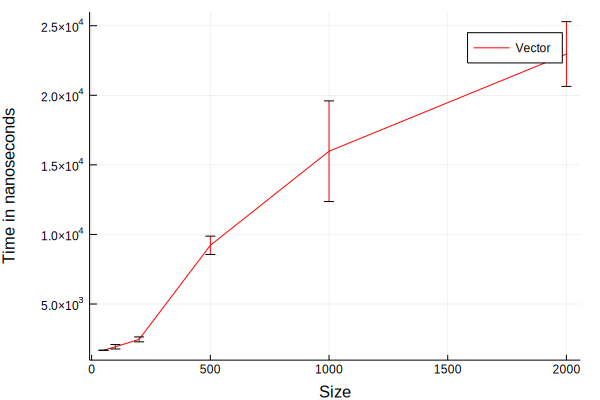

In [58]:
using Plots 
plot(times_grouped[:SizeOfVector],[times_grouped[:VectorTime_mean]],colour = [:red],yerr=times_grouped[:VectorTime_std],label=["Vector"],xlabel="Size",ylabel="Time in nanoseconds")

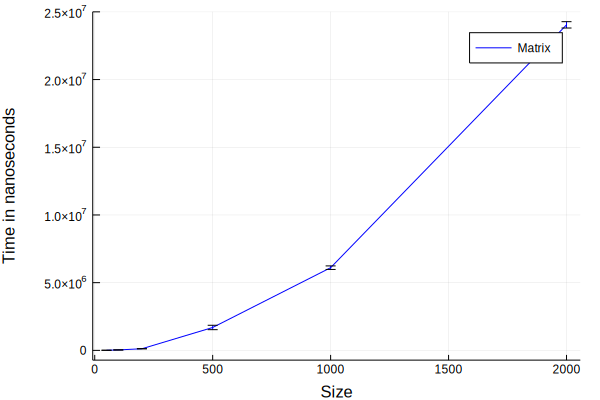

In [59]:
using Plots 
plot(times_grouped[:SizeOfVector],[times_grouped[:MatrixTime_mean]],colour = [:blue],yerr=times_grouped[:MatrixTime_std],label=["Matrix"],xlabel="Size",ylabel="Time in nanoseconds")

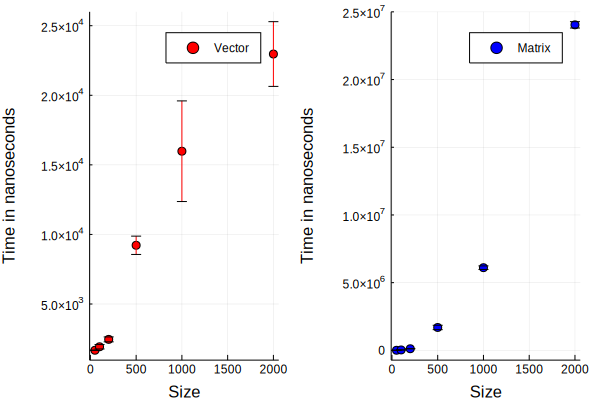

In [8]:
using Plots 
a = scatter(times_grouped[:SizeOfVector],[times_grouped[:VectorTime_mean], times_grouped[:MatrixTime_mean]],colour = [:red :blue],yerr=[times_grouped[:VectorTime_std] times_grouped[:MatrixTime_std]],label=["Vector" "Matrix"],xlabel="Size",ylabel="Time in nanoseconds",layout=2)